In [70]:
# Importing 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

(200, 1) 2
(200, 1) 2


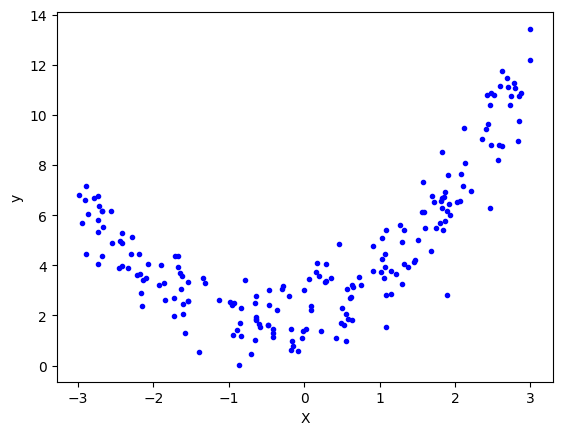

In [71]:
X = 6 * np.random.rand(200, 1) - 3                      # 2D array of no's between +-3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)  # 2D array of equ. with noise

print(X.shape, X.ndim)
print(y.shape, y.ndim)

plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

r2 score performing Linear Regression: 0.31807874289520965


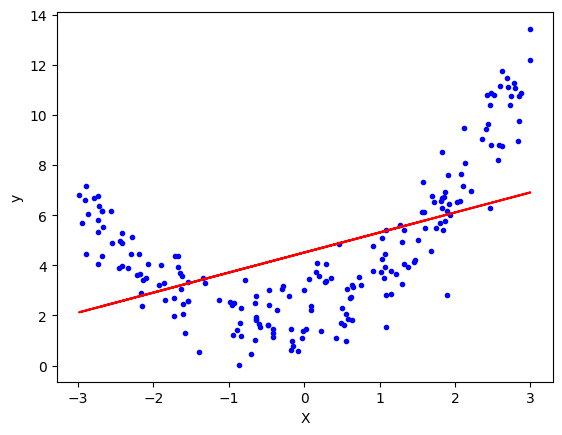

In [73]:
# Data is not Linearly Distributed . However Lets apply LR to see model performance
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2 score performing Linear Regression:',r2)

# lets see best fit line 
plt.plot(X, y, 'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.plot(X_train, lr.predict(X_train), color='r')
plt.show()

# data is not linear . we enfore LR 

In [74]:
# Now lets see how Polynomial LR works with this data
# Preprocesssing X and y 
poly = PolynomialFeatures(degree=2, include_bias=True) # by default bias is True
X_train_transform = poly.fit_transform(X_train)
X_test_transform = poly.transform(X_test)
print('Before (b0) VS After (b0x^0, b1x^1, b2x^2) Preprocessing:')
print(X_train[0], X_train_transform[0])

lr = LinearRegression()
lr.fit(X_train_transform, y_train)
y_pred = lr.predict(X_test_transform)
r2 = r2_score(y_test,y_pred)
print('r2 score performing Ploynomial Regression:', r2)

print('Coefficients are:',lr.coef_)
print('intercept is',lr.intercept_)

Before (b0) VS After (b0x^0, b1x^1, b2x^2) Preprocessing:
[1.60360159] [1.         1.60360159 2.57153807]
r2 score performing Ploynomial Regression: 0.9136246626863996
Coefficients are: [[0.         0.88956126 0.80377427]]
intercept is [2.02172383]


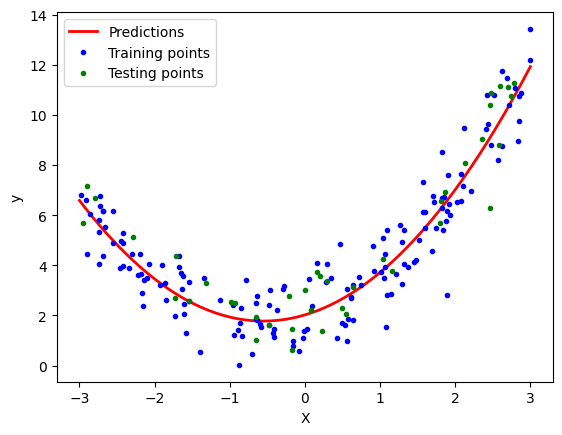

In [75]:
# Now lets see best fit curve 
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)


plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()